In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../code'))

import pandas as pd 
import numpy as np 
target_job = '4082885'

In [6]:
z = " fuck ".strip()
z

'fuck'

In [2]:
sys.path

['/Users/ferguscurrie/Documents/Uni/Research/Implementations/notebooks',
 '/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python39.zip',
 '/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9',
 '/usr/local/Cellar/python@3.9/3.9.12/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload',
 '',
 '/Users/ferguscurrie/Library/Python/3.9/lib/python/site-packages',
 '/usr/local/lib/python3.9/site-packages',
 '/usr/local/opt/python-tk@3.9/libexec',
 '/usr/local/lib/python3.9/site-packages/IPython/extensions',
 '/Users/ferguscurrie/.ipython']

In [3]:
# First 
names = {} # index to string of names
datasets = ['ionosphere', 'mammo_graphic', 'cleveland', 'wisconsin']
models = ['GP_model', 'MOGP_model', 'NCLMOGP_model', 'PFMOGP_model']
for i,model in enumerate(models):
    for j, dataset in enumerate(datasets):
        names[(i * len(datasets)) + j + 1] = f'{model}{dataset}'
print(names.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])


In [4]:
 # Can be issues here looping through and grabbing the descriptioin
# First load data in 
data = {}
for fn in os.listdir(f'results_file/{target_job}/'):
    fn2 = os.listdir(f'results_file/{target_job}/{fn}/')[1] 
    if '.txt' in fn2:
        fn2 = os.listdir(f'results_file/{target_job}/{fn}/')[0] 
    print(fn2)
    f = f'results_file/{target_job}/{fn}/{fn2}'
    data[int(fn)] = pd.read_csv(f, index_col=False)
print(f'Number of results files in job {target_job} = {len(data)}')

FileNotFoundError: [Errno 2] No such file or directory: 'results_file/4082885/'

In [ ]:
# Quick look at the data
data[1] # 1 -> num jobs

In [ ]:
# method to efficently grab correct subsections from 
def get_data(task_id, member_generation=False, training=False, numpy=False):
    x = data[task_id]
    x = x[x['member_generation'] == member_generation] 
    if numpy:
        x = x[x['training'] == training].to_numpy() # [final]
    else:
        x = x[x['training'] == training] # [final]
    return x

In [ ]:
get_data(1).plot.scatter(x='majority_acc', y='minority_acc')

In [ ]:
# Get the description for each. 
description = pd.DataFrame(data=[get_data(key)['full_acc'].describe() for key in data.keys()])
description = description.reset_index()
description = description.drop(columns='index')
name_dict = {}
i = 0
for model in models:
    for dataset in datasets:
        name_dict[i] = dataset+'_'+model
        i += 1
description.rename(index=name_dict, inplace=True)
description

Results from bhowan using offeel
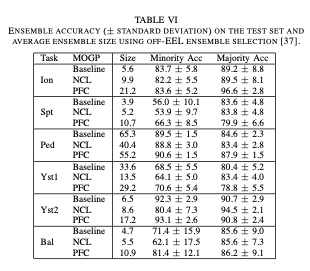

## 